In [ ]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline  

In [ ]:
dates = [0,1,2,3,4,5]
labels = ['Start','Network+Server Send/Recv','Server Queue','Server Compute Input','Server Compute Infer','Server Compute Output']
# labels with associated dates


In [ ]:
data_f = open("/content/test2.csv")

temp =[]

flag = 0
for line in data_f:
    if flag == 0:
        flag += 1
        continue 
    temp = line.split(',')       

date =[]
sum = 0
temp[2] = '0'
for i in range(6):
    date.append(sum + int(temp[i+2]))
    sum = date[i]
temp = temp[3:8]
print(temp)
data_f.close() 

for i in range(len(date)):
    labels[i] = labels[i] + "\n" + str(date[i]) + " usec"

['20683', '22', '29', '350973', '52']


In [ ]:
font1 = {'family': 'serif',
        'color':  'dimgrey',
        'weight': 'normal',
        'size': 11}

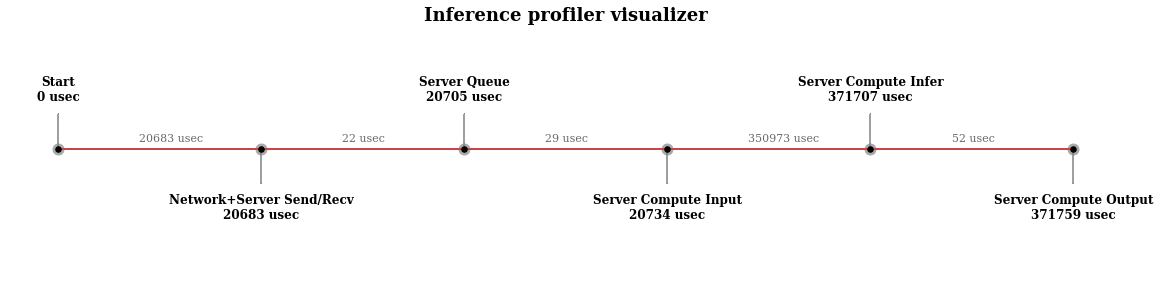

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.axhline(0, xmin=0.05, xmax=0.95, c='grey', zorder=1)
ax.scatter(dates, np.zeros(len(dates)), s=120, c='darkgrey', zorder=2)
ax.scatter(dates, np.zeros(len(dates)), s=30, c='black', zorder=3)

label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.7
label_offsets[1::2] = -1
for i, (l, d) in enumerate(zip(labels, dates)):
    ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='black',fontsize=12)

stems = np.zeros(len(dates))
stems[::2] = 0.5
stems[1::2] = -0.5   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
plt.setp(markerline, marker=',', color='grey')
plt.setp(stemline, color='grey')

for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
ax.set_xticks([])
ax.set_yticks([])
 
ax.set_title('Inference profiler visualizer', fontweight="bold", fontfamily='serif', fontsize=18, color='black')

i = 0.4
for time in temp:
    plt.text(i, 0.1, str(time)+" usec", fontdict=font1)
    i += 1


